In [26]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations

In [27]:
df_rating = pd.read_csv("data/full_restaurant_rating_data.csv")

In [28]:
df_rating.columns

Index(['name', 'address', 'region', 'latitude', 'longitude',
       'nearby_attraction', 'distance_from_attraction', 'price_category',
       'price_range', 'mon_operating_hours', 'tue_operating_hours',
       'wed_operating_hours', 'thu_operating_hours', 'fri_operating_hours',
       'sat_operating_hours', 'sun_operating_hours', 'is_travellors_choice',
       'is_michellin', 'about', 'list_of_meals', 'list_of_cuisines',
       'list_of_features', 'list_of_special_diets', 'num_of_reviews',
       'num_of_rating_1', 'num_of_rating_2', 'num_of_rating_3',
       'num_of_rating_4', 'num_of_rating_5', 'food_rating', 'service_rating',
       'value_rating', 'atmosphere_rating', 'overall_rating', 'url'],
      dtype='object')

### 1. Exploratory Data Analysis - Nearby Attraction

Looking at the various nearby attraction that exist in the dataset

#### 1.1 Proportion of Nearby Attraction

In [29]:
nearby_attraction_count = df_rating['nearby_attraction'].value_counts(dropna=False)
nearby_attraction_fig = px.pie(nearby_attraction_count, names=nearby_attraction_count.index, values='nearby_attraction', width=800, height=400)
nearby_attraction_fig.show()

#### 1.2 Proportion of Nearby Attraction [Excluding Null]

In [30]:
nearby_attraction_count = df_rating['nearby_attraction'].value_counts()
nearby_attraction_fig = px.pie(nearby_attraction_count, names=nearby_attraction_count.index, values='nearby_attraction', width=800, height=400)
nearby_attraction_fig.show()

#### 1.3 Correlation between Nearby Attraction, Distance From Attraction, Price Category and Overall Rating

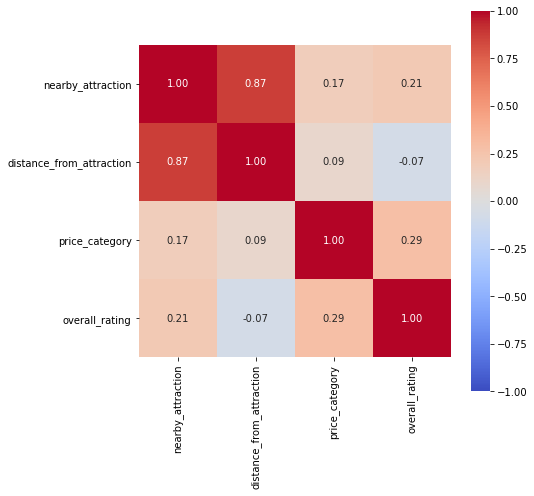

In [31]:
# associations uses:
# Pearson's R for continuous-continuous cases, 
# Correlation Ratio for categorical-continuous cases,
# Cramer's V or Theil's U for categorical-categorical cases.
complete_correlation = associations(df_rating[['nearby_attraction', 'distance_from_attraction', 'price_category', 'overall_rating']].copy(), figsize=(7,7), cmap='coolwarm')

#### 1.4 Mean Overall Rating across Nearby Attractions

In [32]:
sub_df = df_rating[['nearby_attraction', 'overall_rating']].copy()

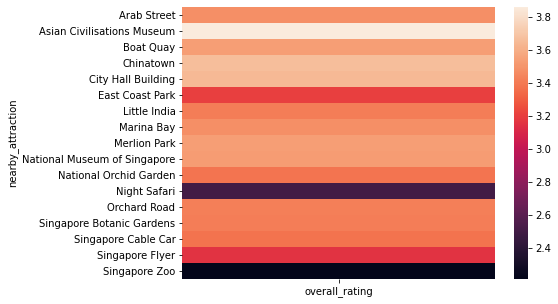

In [33]:
fig, ax = plt.subplots(figsize=(7,5))
df_heatmap = sub_df.pivot_table(values='overall_rating',columns='nearby_attraction', aggfunc=np.mean)
ax = sns.heatmap(df_heatmap.transpose())

#### 1.4 Median Overall Rating across Nearby Attractions

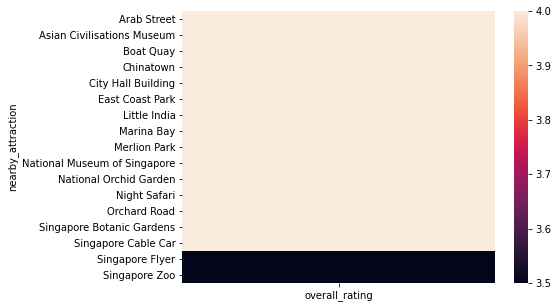

In [34]:
fig, ax = plt.subplots(figsize=(7,5))
df_heatmap = sub_df.pivot_table(values='overall_rating',columns='nearby_attraction',aggfunc=np.median)
ax = sns.heatmap(df_heatmap.transpose())

#### 1.5 Percentage of restaurants with particular rating out of restaurants with that nearby attraction
- row-wise

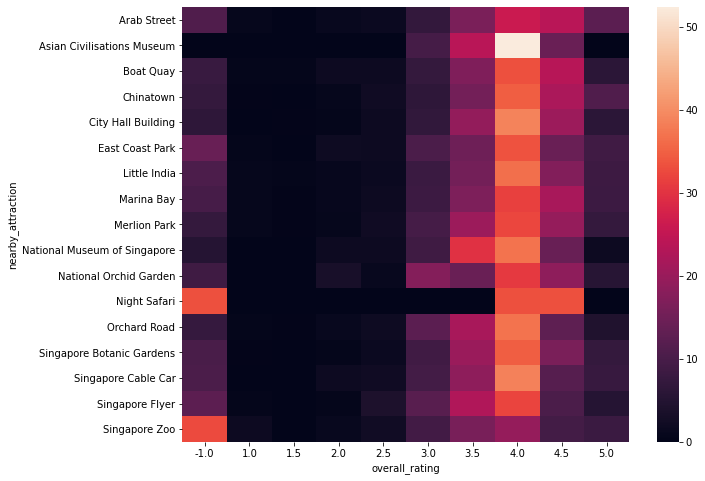

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
rating_nearby_count = df_rating.groupby(['overall_rating', 'nearby_attraction'])['url'].count()
nearby_count = df_rating.groupby(['nearby_attraction'])['url'].count()
df_heatmap = (rating_nearby_count.div(nearby_count, level='nearby_attraction') * 100).unstack(fill_value=0)
ax = sns.heatmap(df_heatmap.transpose())

#### 1.6 Percentage of restaurants with particular nearby attraction out of restaurants with that rating
- column-wise

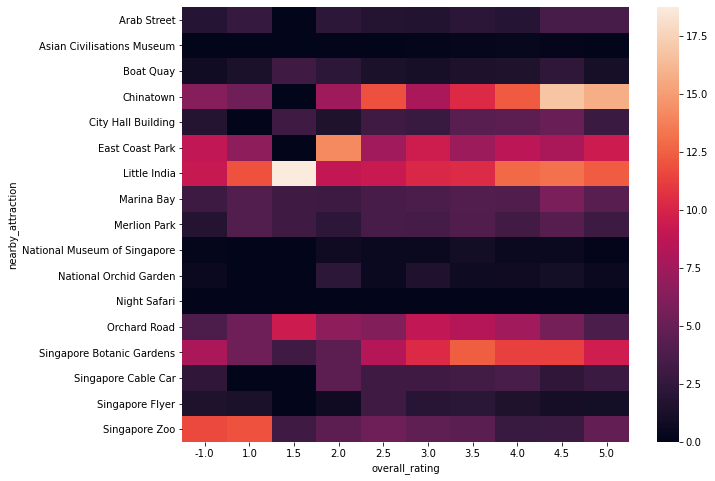

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
rating_nearby_count = df_rating.groupby(['overall_rating', 'nearby_attraction'])['url'].count()
nearby_count = df_rating.groupby(['overall_rating'])['url'].count()
df_heatmap = (rating_nearby_count.div(nearby_count, level='overall_rating') * 100).unstack(fill_value=0)
ax = sns.heatmap(df_heatmap.transpose())

#### 1.7 Number of restaurants by nearby attraction and by rating

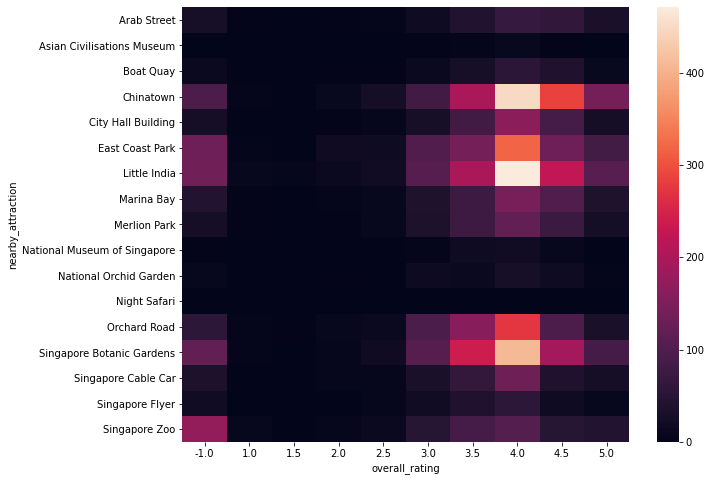

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
df_heatmap = df_rating.groupby(['overall_rating', 'nearby_attraction'])['url'].count().unstack(fill_value=0)
ax = sns.heatmap(df_heatmap.transpose())

### 2. Exploratory Data Analysis - Nearby Attraction [Grouped]

Looking at the various nearby attraction that exist in the dataset after grouping

#### 2.1 Count of restaurants by nearby attraction 

In [38]:
df_rating.groupby(['nearby_attraction'])['url'].count()

nearby_attraction
Arab Street                      257
Asian Civilisations Museum        21
Boat Quay                        165
Chinatown                       1290
City Hall Building               424
East Coast Park                  948
Little India                    1293
Marina Bay                       455
Merlion Park                     370
National Museum of Singapore      57
National Orchid Garden            91
Night Safari                       3
Orchard Road                     741
Singapore Botanic Gardens       1181
Singapore Cable Car              342
Singapore Flyer                  175
Singapore Zoo                    530
Name: url, dtype: int64

Grouping
- 'Asian Civilisations Museum', 'National Museum of Singapore', 'City Hall Building' to 'Museum'
- 'National Orchid Garden', 'Singapore Botanic Gardens' to 'Garden'
- 'Singapore Cable Car', 'Singapore Flyer' to 'Observation'
- 'Night Safari', 'Singapore Zoo' to 'Wildlife'

In [39]:
bucket_df = df_rating.copy()
bucket_df = bucket_df.replace(to_replace =['Asian Civilisations Museum', 'National Museum of Singapore', 'City Hall Building'], value ="Museum")
bucket_df = bucket_df.replace(to_replace =['National Orchid Garden', 'Singapore Botanic Gardens'], value ="Garden")
bucket_df = bucket_df.replace(to_replace =['Singapore Cable Car', 'Singapore Flyer'], value ="Observation")
bucket_df = bucket_df.replace(to_replace =['Night Safari', 'Singapore Zoo'], value ="Wildlife")

#### 2.2 Count of restaurants by nearby attraction after grouping

In [40]:
bucket_df.groupby(['nearby_attraction'])['url'].count()

nearby_attraction
Arab Street         257
Boat Quay           165
Chinatown          1290
East Coast Park     948
Garden             1272
Little India       1293
Marina Bay          455
Merlion Park        370
Museum              502
Observation         517
Orchard Road        741
Wildlife            533
Name: url, dtype: int64

#### 2.3 Proportion of Grouped Nearby Attraction 

In [41]:
nearby_attraction_count = bucket_df['nearby_attraction'].value_counts(dropna=False)
nearby_attraction_fig = px.pie(nearby_attraction_count, names=nearby_attraction_count.index, values='nearby_attraction', width=800, height=400)
nearby_attraction_fig.show()

#### 2.4 Proportion of Grouped Nearby Attraction [Excluding Null]

In [42]:
nearby_attraction_count = bucket_df['nearby_attraction'].value_counts()
nearby_attraction_fig = px.pie(nearby_attraction_count, names=nearby_attraction_count.index, values='nearby_attraction', width=800, height=400)
nearby_attraction_fig.show()

#### 2.5 Mean Overall Rating across Grouped Nearby Attractions

In [43]:
sub_df = bucket_df[['nearby_attraction', 'overall_rating']].copy()

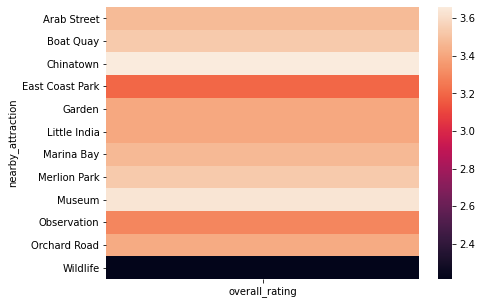

In [44]:
fig, ax = plt.subplots(figsize=(7,5))
df_heatmap = sub_df.pivot_table(values='overall_rating',columns='nearby_attraction', aggfunc=np.mean)
ax = sns.heatmap(df_heatmap.transpose())

#### 2.6 Median Overall Rating across Grouped Nearby Attractions

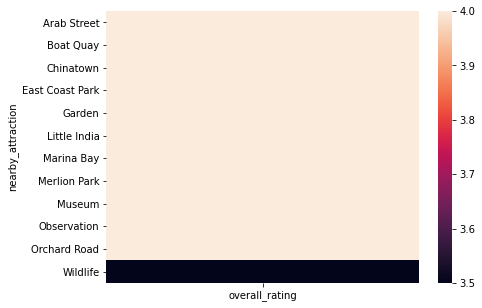

In [45]:
fig, ax = plt.subplots(figsize=(7,5))
df_heatmap = sub_df.pivot_table(values='overall_rating',columns='nearby_attraction',aggfunc=np.median)
ax = sns.heatmap(df_heatmap.transpose())

#### 2.7 Percentage of restaurants with particular rating out of restaurants with that grouped nearby attraction
- row-wise

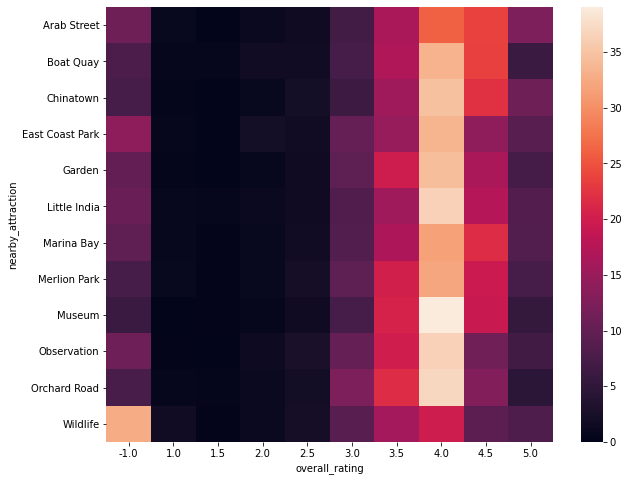

In [46]:
fig, ax = plt.subplots(figsize=(10,8))
rating_nearby_count = bucket_df.groupby(['overall_rating', 'nearby_attraction'])['url'].count()
nearby_count = bucket_df.groupby(['nearby_attraction'])['url'].count()
df_heatmap = (rating_nearby_count.div(nearby_count, level='nearby_attraction') * 100).unstack(fill_value=0)
ax = sns.heatmap(df_heatmap.transpose())

#### 2.8 Percentage of restaurants with particular grouped nearby attraction out of restaurants with that rating
- column-wise

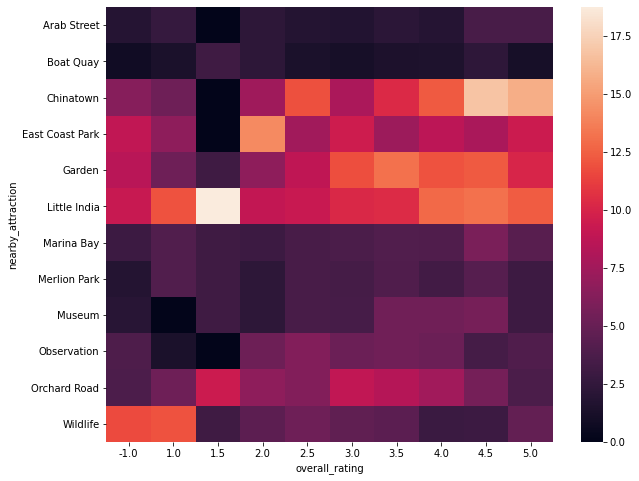

In [47]:
fig, ax = plt.subplots(figsize=(10,8))
rating_nearby_count = bucket_df.groupby(['overall_rating', 'nearby_attraction'])['url'].count()
nearby_count = bucket_df.groupby(['overall_rating'])['url'].count()
df_heatmap = (rating_nearby_count.div(nearby_count, level='overall_rating') * 100).unstack(fill_value=0)
ax = sns.heatmap(df_heatmap.transpose())

#### 2.8 Number of restaurants by grouped nearby attraction and by rating

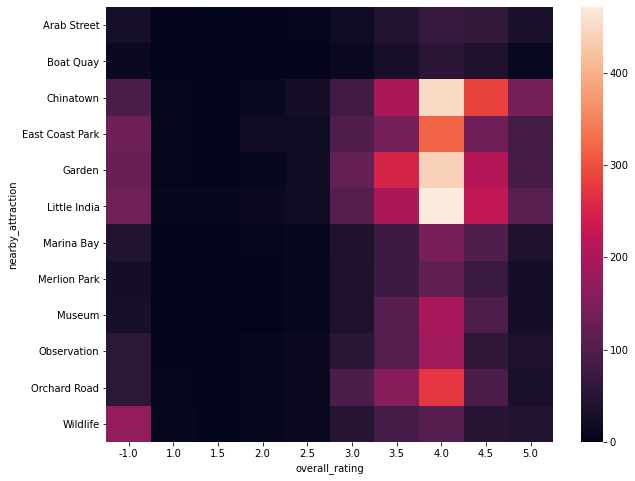

In [48]:
fig, ax = plt.subplots(figsize=(10,8))
df_heatmap = bucket_df.groupby(['overall_rating', 'nearby_attraction'])['url'].count().unstack(fill_value=0)
ax = sns.heatmap(df_heatmap.transpose())

#### 3.0 Check feasibility of feature cross: Grouped Nearby Attraction, Distance From Attraction

In [50]:
bucket_df.groupby(['nearby_attraction', 'distance_from_attraction']).agg({'url': 'count'})

url
nearby_attraction distance_from_attraction     
Arab Street       0.0                        18
                  0.1                        25
                  0.2                        25
                  0.3                        28
                  0.4                        13
...                                         ...
Wildlife          6.8                         3
                  6.9                         2
                  7.0                         8
                  7.1                         1
                  7.8                         3

[336 rows x 1 columns]

In [74]:
bucket_df.groupby(['nearby_attraction'], dropna=False).agg({'distance_from_attraction': ['min', 'max', 'median']})

distance_from_attraction            
                                       min  max median
nearby_attraction                                     
Arab Street                            0.0  2.8   0.50
Boat Quay                              0.2  0.7   0.40
Chinatown                              0.0  2.2   0.50
East Coast Park                        0.3  6.9   2.25
Garden                                 0.0  5.8   2.30
Little India                           0.0  3.1   0.90
Marina Bay                             0.1  2.0   0.60
Merlion Park                           0.0  1.1   0.60
Museum                                 0.0  0.9   0.40
Observation                            0.0  4.2   0.90
Orchard Road                           0.0  2.3   0.40
Wildlife                               0.0  7.8   5.40
NaN                                    NaN  NaN    NaN

In [76]:
bucket_df.groupby(['nearby_attraction'], dropna=False)['url'].count()

nearby_attraction
Arab Street         257
Boat Quay           165
Chinatown          1290
East Coast Park     948
Garden             1272
Little India       1293
Marina Bay          455
Merlion Park        370
Museum              502
Observation         517
Orchard Road        741
Wildlife            533
NaN                2818
Name: url, dtype: int64

In [67]:
median_by_attraction = bucket_df.groupby(['nearby_attraction']).agg({'distance_from_attraction': ['min', 'max', 'median']})['distance_from_attraction']['median'].to_dict()
bucket_df["above_median"] =  bucket_df[['distance_from_attraction', 'nearby_attraction']].apply(lambda x: x['distance_from_attraction'] > median_by_attraction[x['nearby_attraction']] if not pd.isna(x['nearby_attraction']) else np.nan, axis=1)
bucket_df["above_median"] = bucket_df["above_median"].astype(float)

In [70]:
bucket_df["above_median"].unique()

array([ 1.,  0., nan])

In [71]:
bucket_df.groupby(['nearby_attraction', 'above_median']).agg({'url': 'count'})

url
nearby_attraction above_median     
Arab Street       0.0           192
                  1.0            65
Boat Quay         0.0            94
                  1.0            71
Chinatown         0.0           807
                  1.0           483
East Coast Park   0.0           474
                  1.0           474
Garden            0.0           641
                  1.0           631
Little India      0.0           710
                  1.0           583
Marina Bay        0.0           341
                  1.0           114
Merlion Park      0.0           265
                  1.0           105
Museum            0.0           271
                  1.0           231
Observation       0.0           281
                  1.0           236
Orchard Road      0.0           412
                  1.0           329
Wildlife          0.0           288
                  1.0           245